# Implementing Simple Linear Regression using Gradient Descent


**Importing required libraries**

In [1]:
import numpy as np
from sklearn import metrics, datasets
from sklearn.preprocessing import StandardScaler

In [2]:
X,y = datasets.load_boston(return_X_y = True)
X = X[:,12]

**Dividing the data into training set and testing set**

In [3]:
X_train = X[0:400]

# create a temp array with all zeros of shape (400,2) for adding one extra column of ones
shape_tuple = (X_train.shape[0],2);
X_temp = np.zeros(shape_tuple)

# create a column vector of shape (400,1) containing all the ones for X0
column1 = np.ones(X_train.shape[0])

# add this column as the first column of X_temp
X_temp[:,0] = column1;

# add the rest of the training data to it and finally assign it back to X_train
X_temp[:,1:] = X_train.reshape(X_train.shape[0],1);
X_train = X_temp;
print("Shape of training data: {}".format(X_train.shape))


# getting our y_train vector
y_train = y[0:400]
y_train = y_train.reshape(y_train.shape[0],1)
print("Shape of training result: {}".format(y_train.shape))

Shape of training data: (400, 2)
Shape of training result: (400, 1)


In [4]:
# remaining data will be our testing data

X_test = X[400:]
print(X_test.shape)

# create a temp array with all zeros of shape (400,2) for adding one extra column of ones
shape_tuple = (X_test.shape[0],2);
X_temp = np.zeros(shape_tuple)

# create a column vector of shape (400,1) containing all the ones for X0
column1 = np.ones(X_test.shape[0])

# add this column as the first column of X_temp
X_temp[:,0] = column1;

# add the rest of the training data to it and finally assign it back to X_train
X_temp[:,1:] = X_test.reshape(X_test.shape[0],1)
X_test = X_temp
print("Shape of testing data: {}".format(X_test.shape))

# getting our y_test vector
y_test = y[400:]
y_test = y_test.reshape(y_test.shape[0],1)
print("Shape of testing result: {}".format(y_test.shape))

(106,)
Shape of testing data: (106, 2)
Shape of testing result: (106, 1)


**Performing feature scaling**

In [5]:
# initializing the theta vector with random uniform values between 0 and 1
# shape of theta is (2,1)
theta = np.random.uniform(0,1,(X_train.shape[1],1))
print(theta)

# feature scaling the X_train data to bring the range of values of all columns in [0,1]
scaler = StandardScaler()

# ftting the data (i.e. finding out the mean and standard dev for normalization)
scaler.fit(X_train[:,1:])

# scaling the data and assigning it back to X_train and X_test
X_train[:,1:] = scaler.transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

[[0.55427853]
 [0.96249483]]


**Performing Gradient Descent**

In [6]:
epochs = 400
alpha = 0.01
m = X_train.shape[0]
n = X_train.shape[1]
j_history = np.zeros(epochs);
iterations = np.zeros(epochs);

for i in range(0,epochs+1):
#     calculating the hypothesis function/ y_predicted by dot product of X_train and theta
#     X_train.shape = (400,2), theta.shape = (2,1), thus h.shape = (400,1). 
#     This way we predict 400 values from the given data

    h = np.dot(X_train,theta)
    
    
#     calculating the error between the original and the predicted values
#     h.shape = y_train.shape = (400,1), error.shape = (400,1)
    error = h - y_train;
    
    
#     reducing theta by the formula theta = theta - (alpha/m) * sum(h(i)-y(i)).x(i)
#     X_train.shape = (400,2), error.shape(400,1), thus we take transpose of X_train to give theta.shape = (2,1)
    theta = theta - ((alpha/m) * (X_train.T.dot(error)))
    
    if (i != epochs):
        j_history[i] = (1/(2*m)) * np.sum((h-y_train)**2)
        iterations[i] = i
    
print("Theta vector: ", theta)
print("Theta shape: ", theta.shape)

Theta vector:  [[23.91190055]
 [-6.28643551]]
Theta shape:  (2, 1)


**Testing our model**

In [7]:
prediction = np.dot(X_test,theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 3.654122634752182
MSE 22.254606947509647


**Checking convergence of cost function**

In [8]:
import matplotlib.pyplot as plt

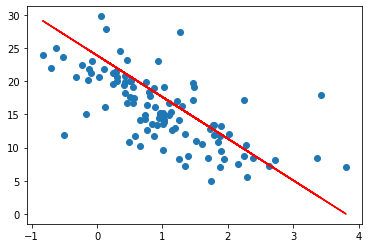

In [9]:
plt.scatter(X_test[:,1],y_test)
plt.plot(X_test[:,1],prediction,color = 'red')

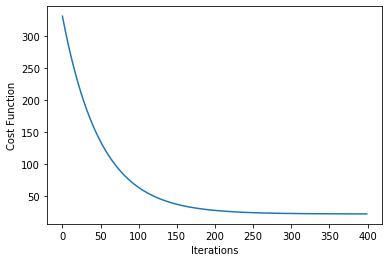

In [10]:
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.plot(iterations,j_history)